In [25]:
import pandas as pd
import numpy as np
import datetime
import missingno as msno
import matplotlib.pyplot as plt

In [39]:
listings = pd.read_csv('data/listings.csv')
prices = pd.read_csv('data/stock_prices.csv').set_index('date')
volumes = pd.read_csv('data/stock_volumes.csv').set_index('date')

prices.index = pd.to_datetime(prices.index)
volumes.index = pd.to_datetime(volumes.index)

combined = pd.DataFrame(index=prices.index, columns=pd.MultiIndex.from_product([[], ['price', 'volume']]))

unique_stock_names = prices.columns
for col in unique_stock_names:
    combined.loc[:, (col, 'price')] = prices.loc[:, col]
    combined.loc[:, (col, 'volume')] = volumes.loc[:, col]

yesterday = combined.shift(periods=1)

combined # MultiIndex columns

# # How to slice MultiIndex
# idx = pd.IndexSlice
# combined.loc[:, idx[:, 'price']]

930060        699903        879841         314909         15362F  \
            price volume  price volume  price volume   price  volume  price   
date                                                                          
2003-01-02  25.50  173.4   1.47    6.6   5.80    0.0   32.08   358.3   9.90   
2003-01-03  25.70   10.6   1.47  143.5   5.80    0.0   32.70   729.1   9.80   
2003-01-06  25.60   81.4   1.47    NaN   5.80    0.0   33.35  1235.6   9.80   
2003-01-07  25.50   28.0   1.47   13.4   5.75    0.0   35.50  1286.9   9.80   
2003-01-08  25.50  267.0   1.47   47.7   5.75    NaN   34.24  1178.6   9.80   
...           ...    ...    ...    ...    ...    ...     ...     ...    ...   
2021-06-24  99.28   62.4   0.02    NaN   7.60    NaN  134.00  1445.6  57.01   
2021-06-25  99.00   83.5   0.02    NaN   7.60    NaN  135.49  1716.6  57.01   
2021-06-28  97.65   92.1   0.02    NaN   7.60    NaN  131.65  2235.2  57.01   
2021-06-29  99.33   87.3   0.02    NaN   7.60    NaN  135.08  1947.7  57.01   
2021-06-30  98.31   96.5   0.02    NaN   7.60    NaN  135.72  3512.2  57.01   

                   ... 9911WP          9930FR        99142R         2569A8  \
           volume  ...  price  volume   price volume  price volume   price   
date               ...                                                       
2003-01-02   36.1  ...    NaN     NaN     NaN    NaN    NaN    NaN     NaN   
2003-01-03   91.8  ...    NaN     NaN     NaN    NaN    NaN    NaN     NaN   
2003-01-06   41.1  ...    NaN     NaN     NaN    NaN    NaN    NaN     NaN   
2003-01-07    2.2  ...    NaN     NaN     NaN    NaN    NaN    NaN     NaN   
2003-01-08   24.0  ...    NaN     NaN     NaN    NaN    NaN    NaN     NaN   
...           ...  ...    ...     ...     ...    ...    ...    ...     ...   
2021-06-24    NaN  ...   0.94   611.3  119.50    7.6  91.77   20.0  532.00   
2021-06-25    NaN  ...   0.93  4384.9  120.33    7.4  90.98   36.7  535.10   
2021-06-28    NaN  ...   0.90  1534.8  120.00   11.1  90.54   23.4  536.65   
2021-06-29    NaN  ...   0.95  2637.1  117.51   10.9  90.12   35.4  536.65   
2021-06-30    NaN  ...   0.90   424.6  109.99   85.8  91.01   22.4  530.11   

                  2579PR          
           volume  price  volume  
date                              
2003-01-02    NaN    NaN     NaN  
2003-01-03    NaN    NaN     NaN  
2003-01-06    NaN    NaN     NaN  
2003-01-07    NaN    NaN     NaN  
2003-01-08    NaN    NaN     NaN  
...           ...    ...     ...  
2021-06-24    0.2  36.47  1731.5  
2021-06-25    4.4  37.12  2129.3  
2021-06-28    5.9  37.49  2092.0  
2021-06-29   21.0  38.05  1758.2  
2021-06-30    3.4  38.80  1050.3  

[4656 rows x 752 columns]

today = stock_prices

someModel = fit(train = yesterday, target = today)

someModel.predict(today) -> (hopefully predict tomorrow)

In [27]:
prices.describe()

,930060,699903,879841,314909,15362F,315452,884570,992762,879650,315449,...,9511Z8,95335N,96147L,9664FT,9664FU,9911WP,9930FR,99142R,2569A8,2579PR
count,4656.000000,4656.000000,4656.000000,4656.000000,4656.000000,4656.000000,4656.000000,4656.000000,4656.000000,4656.000000,...,455.000000,391.000000,2112.000000,327.000000,327.000000,148.000000,110.000000,134.000000,50.000000,18.000000
mean,79.413144,0.502768,7.549040,125.330075,39.402792,21.719008,6.350339,5.550144,1.917451,21.340619,...,1428.022110,244.010793,22.039124,44.562355,45.214985,0.586216,154.153909,85.023657,532.475000,31.605556
std,28.156876,0.772439,0.276386,39.112264,15.818344,8.728050,0.926189,4.886155,0.018359,2.472721,...,266.325782,108.473167,15.982732,3.961583,3.733149,0.181994,25.640554,10.653072,40.517845,5.062314
min,21.150000,0.020000,5.050000,29.400000,9.500000,1.350000,3.040000,0.150000,1.700000,11.000000,...,891.620000,111.940000,4.200000,25.700000,27.500000,0.310000,109.990000,64.000000,449.020000,21.900000
25%,58.500000,0.020000,7.600000,100.500000,26.947500,15.607500,5.630000,0.310000,1.920000,22.200000,...,1136.375000,145.950000,11.320000,43.500000,44.025000,0.470000,131.950000,76.740000,500.000000,28.200000
50%,82.500000,0.020000,7.600000,134.840000,40.000000,23.195000,6.800000,5.195000,1.920000,22.200000,...,1515.650000,231.830000,16.080000,45.310000,45.990000,0.560000,147.750000,85.000000,532.615000,31.745000
75%,101.005000,1.000000,7.600000,152.135000,57.010000,28.225000,7.080000,10.340000,1.920000,22.200000,...,1639.020000,310.985000,29.027500,47.010000,47.660000,0.630000,177.937500,94.010000,549.745000,36.590000
max,138.200000,3.170000,7.700000,207.000000,57.570000,42.590000,7.840000,14.380000,1.920000,23.950000,...,1937.760000,503.850000,74.670000,50.510000,50.800000,1.010000,215.000000,103.720000,620.000000,38.800000


4505


(4656, 34)

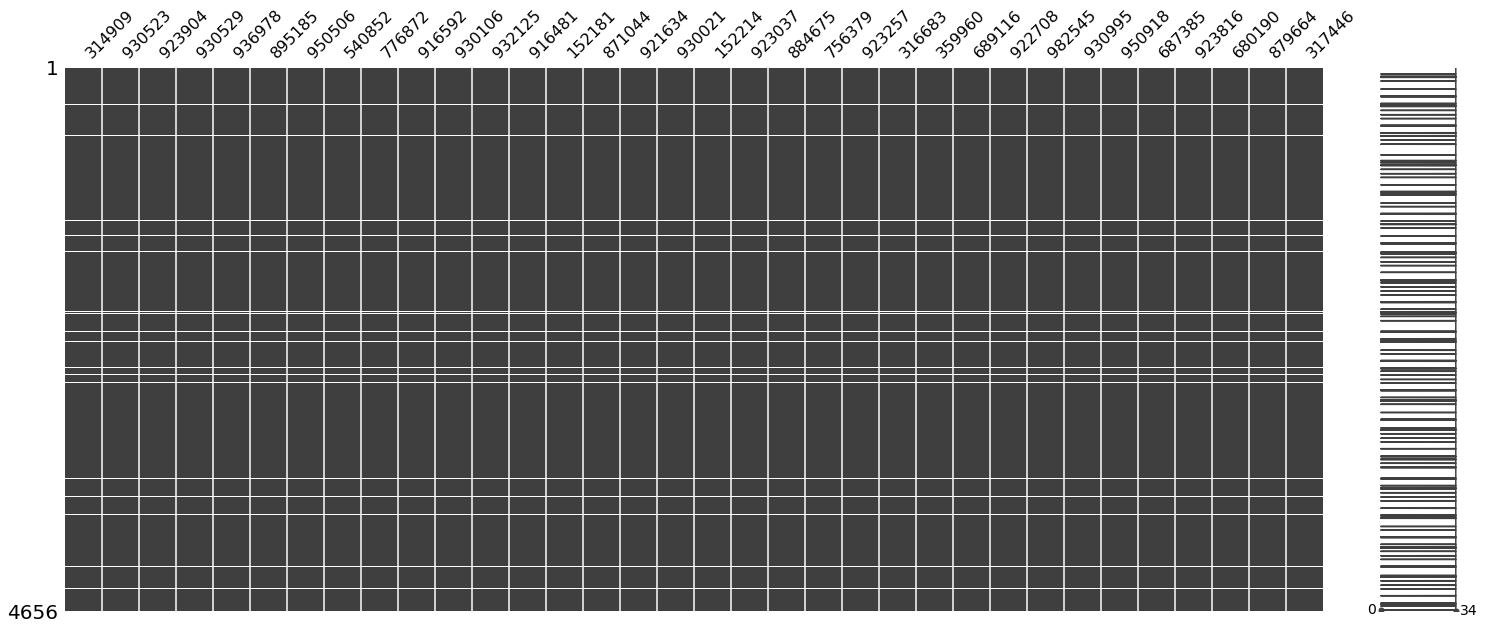

In [28]:
df = volumes
max_missing = 151
print(df.shape[0] - max_missing)
msno.matrix(df.dropna(axis=1, thresh=df.shape[0]-max_missing))

df.dropna(axis=1, thresh=df.shape[0]-max_missing).shape

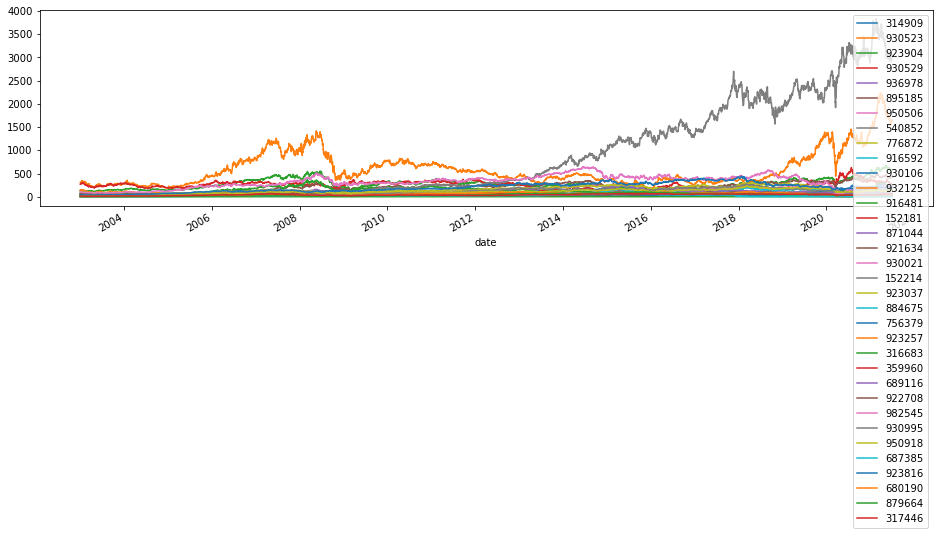

In [29]:
# from time import sleep
# '316683' (weird volume)

stocks = df.dropna(axis=1, thresh=df.shape[0]-max_missing).columns
for stock in stocks:
    prices.loc[:, stock].plot(figsize=(16, 4), legend=True);

In [30]:
# # First one we tried = 152214

# from sklearn.linear_model import LinearRegression
# from sklearn.model_selection import train_test_split 
# from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# import seaborn as sns

# results = pd.DataFrame(index=prices.columns)

# for stock in prices.columns:
    
# #     prices.loc["2016":"2021", stock].plot(figsize=(16, 4), legend=True);


#     test = pd.DataFrame(prices.loc["2016":, stock])

#     for day in range(1, 21):
#         test[str(day)+ " day delay"] = test[stock].shift(periods=day)
#     test.dropna(how="any", inplace=True)
    
#     thresh = 500
#     test.dropna(thresh=thresh, axis=1, inplace=True)
    
#     if test.shape[0] < thresh:
#         continue
    
#     X = test.drop(stock, axis=1)
#     y = test[[stock]]

#     X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#     model = LinearRegression()
#     model.fit(X_train, y_train)

#     y_train_pred = model.predict(X_train)
#     y_pred = model.predict(X_test)

#     mse = mean_squared_error(y_true=y_train, y_pred=y_train_pred)
#     mae = mean_absolute_error(y_true=y_train, y_pred=y_train_pred)
#     r2 = r2_score(y_true=y_train, y_pred=y_train_pred)

# #     print("For training data:")
# #     print(("\tmean squared error: {:.2f}\n \tmean absolute error: {:.2f}\n \tcoefficient of determination: {:.4f}")
# #               .format(mse, mae, r2))

#     mse = mean_squared_error(y_true=y_test, y_pred=y_pred)
#     mae = mean_absolute_error(y_true=y_test, y_pred=y_pred)
#     r2 = r2_score(y_true=y_test, y_pred=y_pred)

# #     print("For testing data:")
# #     print(("\tmean squared error: {:.2f}\n \tmean absolute error: {:.2f}\n \tcoefficient of determination: {:.4f}")
# #               .format(mse, mae, r2))

#     y_pred = pd.DataFrame(y_pred, columns=['pred'], index=y_test.index)
#     y_test = y_test.rename(columns={stock:'real'})
#     to_graph = pd.concat([y_pred, y_test], axis=1)
#     to_graph['residuals'] = to_graph.real - to_graph.pred

#     # sns.relplot(x='pred', y='real', data=to_graph)
#     # sns.relplot(x='pred', y='residuals', data=to_graph)


#     # print(test.loc['Jun 2, 2021':'Jun 29, 2021':, '152214'])
#     # print(model.predict([test.loc['Jun 2, 2021':'Jun 29, 2021', '152214']]))


#     last_price = prices.loc[:, stock].iloc[-1]
#     error = mae*100/last_price
#     # print(f"Average percent error: +/- {error:.3f}%")

#     abs_max_residual = to_graph['residuals'].abs().max()
#     # print(f"\nMaximum absolute number of points off: {abs_max_residual:.2f}")
#     # print(f"\tAs a percent of last price ({last_price}): {abs_max_residual*100/last_price:.3f}%")
    
#     results.loc[stock, 'last price'] = last_price
#     results.loc[stock, 'error percent'] = error 
#     results.loc[stock, 'max abs error'] = abs_max_residual
#     results.loc[stock, 'max abs error %'] = abs_max_residual*100/last_price
#     results.loc[stock, 'r2 value'] = r2

# results

For training data:
	mean squared error: 0.00039
 	mean absolute error: 0.01493
 	coefficient of determination: 0.05361
For testing data:
	mean squared error: 0.00044
 	mean absolute error: 0.01539
 	coefficient of determination: -0.05186
Average percent error: +/- -122.552%

Maximum absolute number of points off: 0.07964
	As a percent of last price (-0.012557964904884922): -634.202%


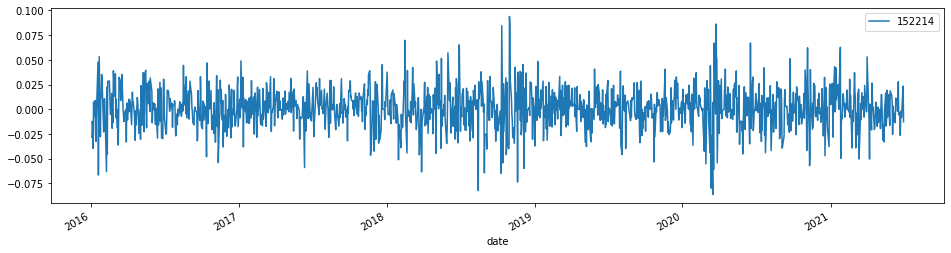

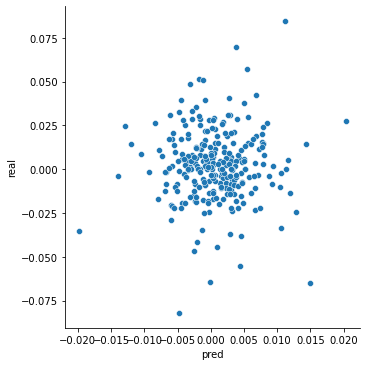

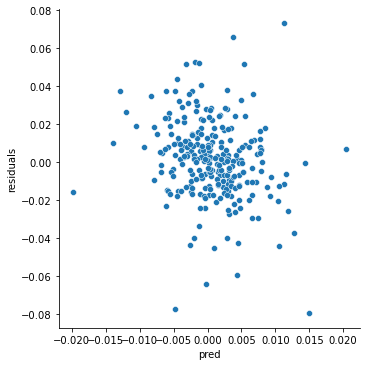

In [40]:
# First one we tried = 152214

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import seaborn as sns
prices = prices.pct_change()
stock = '152214'
prices.loc["2016":"2021", stock].plot(figsize=(16, 4), legend=True);

test = pd.DataFrame(prices.loc["2016":, stock])

for day in range(1, 50):
    test[str(day)+ " day delay"] = test[stock].shift(periods=day)
test.dropna(how="any", inplace=True)

X = test.drop(stock, axis=1)
y = test[[stock]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_pred = model.predict(X_test)

mse = mean_squared_error(y_true=y_train, y_pred=y_train_pred)
mae = mean_absolute_error(y_true=y_train, y_pred=y_train_pred)
r2 = r2_score(y_true=y_train, y_pred=y_train_pred)

print("For training data:")
print(("\tmean squared error: {:.5f}\n \tmean absolute error: {:.5f}\n \tcoefficient of determination: {:.5f}")
          .format(mse, mae, r2))

mse = mean_squared_error(y_true=y_test, y_pred=y_pred)
mae = mean_absolute_error(y_true=y_test, y_pred=y_pred)
r2 = r2_score(y_true=y_test, y_pred=y_pred)

print("For testing data:")
print(("\tmean squared error: {:.5f}\n \tmean absolute error: {:.5f}\n \tcoefficient of determination: {:.5f}")
          .format(mse, mae, r2))

y_pred = pd.DataFrame(y_pred, columns=['pred'], index=y_test.index)
y_test = y_test.rename(columns={stock:'real'})
to_graph = pd.concat([y_pred, y_test], axis=1)
to_graph['residuals'] = to_graph.real - to_graph.pred

sns.relplot(x='pred', y='real', data=to_graph)
sns.relplot(x='pred', y='residuals', data=to_graph)


# print(test.loc['Jun 2, 2021':'Jun 29, 2021':, '152214'])
# print(model.predict([test.loc['Jun 2, 2021':'Jun 29, 2021', '152214']]))


last_price = prices.loc[:, stock].iloc[-1]
error = mae*100/last_price
print(f"Average percent error: +/- {error:.3f}%")

abs_max_residual = to_graph['residuals'].abs().max()
print(f"\nMaximum absolute number of points off: {abs_max_residual:.5f}")
print(f"\tAs a percent of last price ({last_price}): {abs_max_residual*100/last_price:.3f}%")

In [33]:
idxs = results[results['r2 value'] < 0.90].index

# 86631A
prices.loc["Dec 1 2019":"Dec 16 2019", '86631A'].plot(figsize=(16, 4), legend=True);

prices.loc["Dec 1 2019":"Dec 16 2019", '86631A']

# for idx in idxs:
#     prices.loc["2016":"2021", idx].plot(figsize=(16, 4), legend=True);

NameError: name 'results' is not defined

In [ ]:
for col in prices.columns:
    if abs(prices.loc['June 28, 2021', col] - 2536.39) < 1000:
        print(col)

In [ ]:
volumes.loc["Dec 12 2011", '316683']
prices.loc["2011":"2012", '316683'].plot(figsize=(16,4))

In [ ]:
prices["2018":"2021"].isna().sum().sort_values(ascending=True).plot()

In [ ]:
volumes["2018":"2021"].isna().sum().sort_values(ascending=True).plot()